# Deep Dive into the Olympics

*analazying 120 years of data on the Olympics*

Data Source: Kaggle ([120 years of Olympic history: athletes and results](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results) )

@alechter

---

### To begin, let's first load up our libraries and key datasets

In [1]:
#Import libraries and show the versions I used to reproduce this analysis
import numpy as np
print('Numpy version: ' + np.__version__)

import pandas as pd
print('Pandas version: ' + pd.__version__)

import seaborn as sns
print('Seaborn version: ' + sns.__version__)

import matplotlib
print('Matplotlib version: ' + matplotlib.__version__)

import datetime as dt # datetime does not support '__version__' method

import matplotlib.pyplot as plt # pyplt does not support '__version__' method

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import cufflinks as cf
print('cufflinks version: ' + cf.__version__)

#no IPython support for '__version__'
from IPython.display import display, Markdown, display_markdown, Image 

from plotly import __version__
print('Plotly version: ' + __version__)

import plotly.graph_objs as go

%matplotlib inline

Numpy version: 1.17.4
Pandas version: 0.25.3
Seaborn version: 0.9.0
Matplotlib version: 3.1.1
cufflinks version: 0.17.0
Plotly version: 4.4.1


In [2]:
#Plotly configurations
init_notebook_mode(connected = True)
cf.go_offline()

In [3]:
#Load datasets
df_athlete = pd.read_csv('athlete_events.csv') #this is the athlete dataset
df_regions = pd.read_csv('noc_regions.csv') #joins country codes with their respective names 

### Let's quickly inspect both data to get a feel for what sort of questions we can answer here

We'll begin with `df_athlete`.

In [4]:
df_athlete.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
df_athlete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


---
Moving on to `df_regions`

In [6]:
df_regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [7]:
df_regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
NOC       230 non-null object
region    227 non-null object
notes     21 non-null object
dtypes: object(3)
memory usage: 5.5+ KB


### Lots of interesting questions are coming to mind as I check out these 2 sets

`df_regions` seems much less interesting than `df_athlete`. I'll just merge these two together so I can review both simulatenously (done below).

With this data, I can think of at least half a dozen questions I'd love to answer. I've listed two below:
- _What attributes do the best performing athletes share?_
- _Which country has performed the best in this dataset all time?_


I want to answer the first question. To do this, we'll need to manipulate the `df_athlete` dataframe a bit more. This question is pretty tough to answer so let's try some **simpler ones** for now...

**Which country has had the most participants?**

In [8]:
#Combining df_athlete and df_region into a single dataset
df = pd.merge(df_athlete,df_regions,on = 'NOC') 

#Placing title above dataframe
display_markdown('**Countries with the most Olympic Participants:**', raw = True)

#Cleaning up result to look nicer
df_result_one = pd.DataFrame(df['region'].value_counts()[:5])
df_result_one.rename(columns={'region':'Competing Athletes'}
                              , inplace=True)
df_result_one.head()

**Countries with the most Olympic Participants:**

,Competing Athletes
USA,18853
Germany,15883
France,12758
UK,12256
Russia,11692


**How many unique events have there been in the history of the Olympics?**

In [9]:
#Cleaning up result to look nicer
unique_events = df['Event'].nunique()
display_markdown('There have been **{}** unique Olympic events in the last 120 years!'.\
                        format(unique_events), raw = True)

There have been **765** unique Olympic events in the last 120 years!

Holy cow, that's a lot. Important callout though: two identical events besides athlete gender would be counted seperately here (i.e. 2016 Men's Basketball and 2016 Women's Basketball would be classified as 2 unique events).

**Which Olympics had the most event participants?**

In [10]:
#Cleaning up result to look nicer
df_result_two = pd.DataFrame(df['Games'].value_counts()[:5])
df_result_two.rename(columns={'Games':'Competing Athletes'}
                              , inplace=True)
df_result_two.head()

,Competing Athletes
2000 Summer,13798
1996 Summer,13745
2016 Summer,13656
2008 Summer,13566
2004 Summer,13421


Really interesting that the 2000 olympics had the biggest participant roster instead of more recent ones. I certainly wonder why, but there's plenty of other questions to tackle here. Also interesting that only the summer games place in top 5 - probably because there are fewer winter team sports and those with teams are simply smaller in size than those in the summer games.

Now let's begin tackling our tougher question..

---

### What is the breakout by age, height, weight, sex of the athletes competing historically?

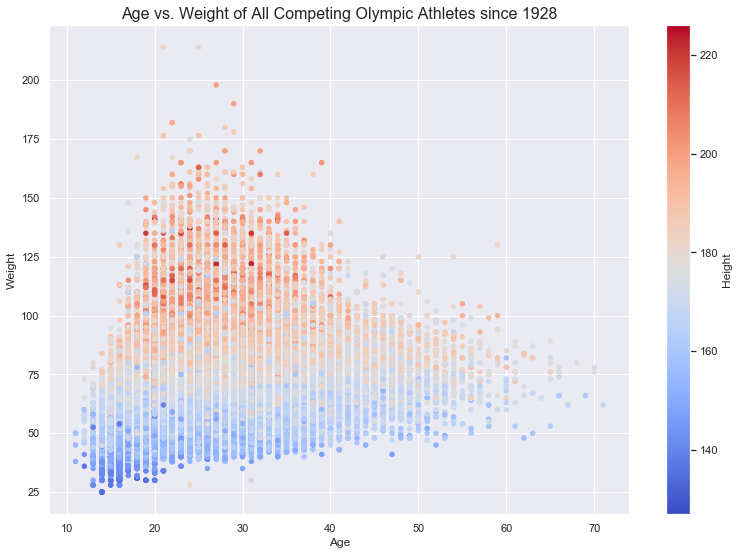

In [11]:
#Modifying visuals to look better for current use case
sns.set_context('notebook')
sns.set_style('darkgrid')

#Building the visual
fig, ax = plt.subplots(figsize = (13,9))
ax.set_title('Age vs. Weight of All Competing Olympic Athletes since 1928', 
             fontdict = {'fontsize':16})
df.plot.scatter(x = 'Age', y = 'Weight', c = 'Height', cmap = 'coolwarm', ax=ax)

Lots of thoughts.

It's clear that **the heaviest athletes who compete in the Olympics are skewed younger**. Intuitively, this is because sports that requires a heavier athlete are also tough on the body. I'm thinking of sports like Basketball, shotput and weightlifting - you'll never see someone over 50 years old competing in any of those.

Additionally, **the variability tightens between athlete weight and height as age increases**. This is probably a result of two factors; namely: self-selection (very large or very tall folks struggle to live long because of health reasons) and sport-availability (the sports in which very old folks compete in do not require abnormal weight or height to be successful).

I want to cut this data further. Specifically, **I'm curious to see interesting trends in gold-medal placing athletes**. Do any clear trends stick out between men vs. women? To do this, I'll need to combine the height and weight datapoints into one metric, "centimeters per kilogram". Credit to Jon Sadka for the revised scatterplot above and a good plan to move forward.

Let's begin with some data manipulation

In [12]:
#Filtering for only gold and adding this new 'Centimeters-per-Kilogram' metric
df_gold_athlete = df[(df['Medal']== 'Gold')]
df_gold_athlete['Centimeters-per-Kilogram'] = (df['Height'] / df['Weight']).round(3)

#Need to breakout the dataset into men vs. women
df_gold_athlete_men = df_gold_athlete[(df_gold_athlete['Sex']== 'M')]
df_gold_athlete_women = df_gold_athlete[(df_gold_athlete['Sex']== 'F')]
df_gold_athlete_women.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Centimeters-per-Kilogram
87,17995,Cao Lei,F,24.0,168.0,75.0,China,CHN,2008 Summer,2008,Summer,Beijing,Weightlifting,Weightlifting Women's Heavyweight,Gold,China,NaN,2.240
180,20217,Chen Jing,F,19.0,170.0,60.0,China,CHN,1988 Summer,1988,Summer,Seoul,Table Tennis,Table Tennis Women's Singles,Gold,China,NaN,2.833
186,20220,Chen Jing,F,28.0,182.0,75.0,China,CHN,2004 Summer,2004,Summer,Athina,Volleyball,Volleyball Women's Volleyball,Gold,China,NaN,2.427
234,20258,Chen Ruolin,F,15.0,160.0,47.0,China,CHN,2008 Summer,2008,Summer,Beijing,Diving,Diving Women's Platform,Gold,China,NaN,3.404
235,20258,Chen Ruolin,F,15.0,160.0,47.0,China,CHN,2008 Summer,2008,Summer,Beijing,Diving,Diving Women's Synchronized Platform,Gold,China,NaN,3.404


and now the visual:

Text(0.5, 1.0, 'Age vs. Centimeters-per-Kilogram between Genders (Gold Medalists only)')

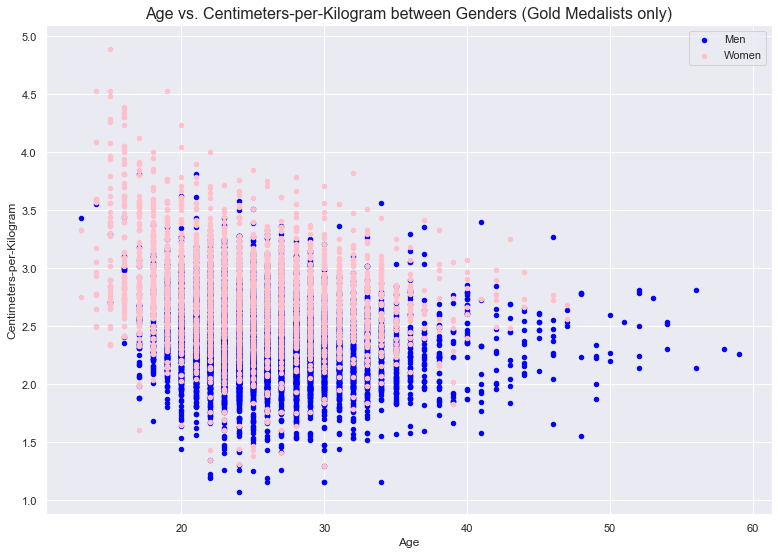

In [13]:
#Men plot
ax = df_gold_athlete_men.plot(kind='scatter', x='Age',
                         y='Centimeters-per-Kilogram',
                         color='Blue', label='Men',
                         figsize = (13,9))

#Women plot
df_gold_athlete_women.plot(kind='scatter', x='Age', 
                           y='Centimeters-per-Kilogram', color='Pink', 
                           label='Women', ax=ax, 
                           figsize = (13,9))

plt.title('Age vs. Centimeters-per-Kilogram between Genders (Gold Medalists only)', fontdict = {'fontsize':16})

Let's pull up corresponding summary stats for Men **(M)** and Women **(W)**

In [14]:
#Pull out key columns and round them (M)
df_summary = pd.DataFrame(df_gold_athlete_men.describe())
df_summary = df_summary[['Age', 'Year', 'Centimeters-per-Kilogram']]
df_summary['Year'] = df_summary['Year'].round(0)
df_summary['Age'] = df_summary['Age'].round(1)
df_summary['Centimeters-per-Kilogram'] = df_summary['Centimeters-per-Kilogram'].round(2)

#Rename columns (M)
df_summary = df_summary.rename(index=str, columns={"Age": "Age (M)", "Year": "Year (M)",'Centimeters-per-Kilogram'
                              : 'Centimeters-per-Kilogram (M)'})

#Pull out key columns and round them (W)
df_summary2 = pd.DataFrame(df_gold_athlete_women.describe())
df_summary2 = df_summary2[['Age', 'Year', 'Centimeters-per-Kilogram']]
df_summary2['Year'] = df_summary2['Year'].round(0)
df_summary2['Age'] = df_summary2['Age'].round(1)
df_summary2['Centimeters-per-Kilogram'] = df_summary2['Centimeters-per-Kilogram'].round(2)

#Rename columns (W)
df_summary2 = df_summary2.rename(index=str, columns={"Age": "Age (W)", "Year": "Year (W)",'Centimeters-per-Kilogram'
                              : 'Centimeters-per-Kilogram (W)' })

#Joining the the two datasets
df_men_women = df_summary.join(df_summary2)

#Reorder columns to better visuals
df_men_women = df_men_women[['Age (M)', 'Age (W)', 'Year (M)', 'Year (W)', 
                             'Centimeters-per-Kilogram (M)', 'Centimeters-per-Kilogram (W)']] 
df_men_women = df_men_women.drop(['count','25%'])

#Display finalized summary stats
display(df_men_women.head())

,Age (M),Age (W),Year (M),Year (W),Centimeters-per-Kilogram (M),Centimeters-per-Kilogram (W)
mean,26.5,24.4,1966.0,1992.0,2.34,2.75
std,6.0,5.2,35.0,22.0,0.31,0.37
min,13.0,13.0,1896.0,1900.0,1.08,1.29
50%,25.0,24.0,1972.0,1998.0,2.32,2.71
75%,29.0,27.0,1996.0,2008.0,2.51,2.95


Let's quickly chat through the stats by column:

**Age**: Men have on average been slightly order than men, with a correspondingly larger standard deviation.

**Year**: Women on average have competed in later Olympics than men and with a tighter standard deviation. Both of these observations most likely reflect relatively new trends in opening up more competitions to women.

**Centimeters-per-Kilogram**: Women have a higher average Centimeters-per-Kilogram and standard deviation. It's difficult to interpret this; one possibility is that women are able to grow taller without a corresponding weight increase that men have.

### Now let's take a deeper look at the women athletes

I'm very curious to see who the best women athletes are, # of total female competitors over time, and the best performing countries in female athletics. This notebook is pretty dense, and I'm also hoping this topic will keep my amazing wife engaged!

Let's begin by seeing **the winningest female athletes**. We'll continue working off of this <span  style = "font-family:courier new,garamond,serif;font-size:14px;background-color: #dedede"> df_gold_athlete_women</span> DataFrame for starters..

In [15]:
#Aggregating by Name, Region and Sport (columns I'm interested in seeing)
byName = df_gold_athlete_women.groupby(['Name', 'region', 'Sport'])
df_best_gold_women = pd.DataFrame(byName.count())

#Drop irrelevant columns and order dataframe by winningest women
df_best_gold_women = df_best_gold_women[['Medal']]
df_best_gold_women = df_best_gold_women.sort_values(by = 'Medal', ascending = False)
df_best_gold_women.reset_index(inplace=True)

#Display cleaned up data
df_best_gold_women.head(5)

,Name,region,Sport,Medal
0,Larysa Semenivna Latynina (Diriy-),Russia,Gymnastics,9
1,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",USA,Swimming,8
2,Birgit Fischer-Schmidt,Germany,Canoeing,8
3,Vra slavsk (-Odloilov),Czech Republic,Gymnastics,7
4,Lyubov Ivanovna Yegorova,Russia,Cross Country Skiing,6


Europe has historically outperformed the USA in terms of top female gold-medalists. I feel like we all should be checking Youtube out for Larysa Semenivna Latynina!!

On to the next question, **what has the historical amount of female Olympic competitors looked like over time?**

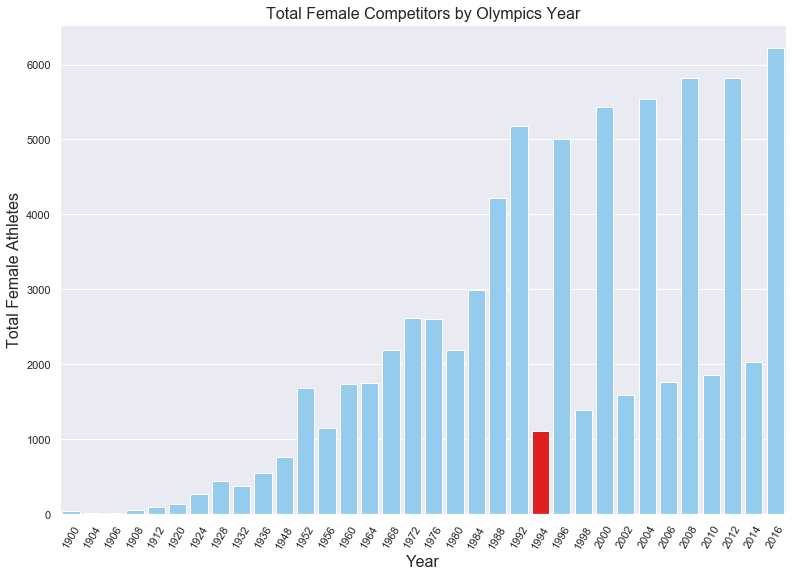

In [16]:
#Pull only women athletes and aggregate by year
df_women = df_athlete[(df_athlete['Sex']== 'F')]
byYear = df_women.groupby(['Year'])
df_women = pd.DataFrame(byYear.count())

#Remove unecessary columns (makes graphing easy)
df_women = df_women[['Name']]
df_women.reset_index(inplace = True)

#Setting visual style
sns.set_context('notebook')
sns.set_color_codes("muted")

#Defining plotting objects
fig, ax = plt.subplots(figsize = (13,9))

#Building and fine tuning visual
plt.xticks(rotation=60)
plt.ylabel('Total Female Athletes', fontdict = {'fontsize':16})
plt.xlabel('Year', fontdict = {'fontsize':16})
plt.title('Total Female Competitors by Olympics Year', fontdict = {'fontsize':16})
values = np.array(df_women['Name'])
idx = np.array(list(df_women['Year'])) 
clrs = ['LightSkyBlue' if (x != 1994) else 'red' for x in idx]
sns.barplot(x=idx, y=values, palette=clrs, label="Total Participants", color="LightSkyBlue") # color=clrs)

**What happened beginning in 1994?** Let's take a look at the amount of events that transpired in 1988 vs 1994.

In [17]:
#Some simple manipulation
df_women = df_athlete[(df_athlete['Sex']== 'F')]
women_1994 = df_women[(df_women['Year'] == 1994)]['Event'].nunique()
women_1988 = df_women[(df_women['Year'] == 1988)]['Event'].nunique()

#Making the text look pretty
display_markdown('''In 1988, there were **{}**  unique events while in 1994, this number was **{}**. 
                According to Brittanica, the Winter and Summer Olympics used to occur on the 
                same year until 1994:'''.format(women_1988, women_1994), raw = True)

In 1988, there were **99**  unique events while in 1994, this number was **27**. 
                According to Brittanica, the Winter and Summer Olympics used to occur on the 
                same year until 1994:

_"After only a two-year interlude, the Olympic Winter Games were held in 1994, when a 1986 amendment to the Olympic Charter calling for the Summer and Winter Games to be held alternately every two years went into effect."_

Clearly even after ignoring this you can see an increasing amount of female Olympics participants over time!

---

### Onto to the final interesting question
_Which country all time has performed the best in this dataset?_

With little Olympics knowledge, most people will say USA. But to what extent have they outperformed other countries? To begin, we'll need to perform some data manipulation

In [18]:
#Aggregating gold medal dataframe by region
df_gold = df[(df['Medal']== 'Gold')]
df_gold['Gold_counter'] = 1
byYear = df_gold.groupby(['region'])
df_gold_total = pd.DataFrame(byYear.sum())

#Dropping unecessary columns
df_gold_total = df_gold_total.drop(['Year'], axis=1)
df_gold_total.reset_index(inplace=True)

#Merging region dataframe and displaying cleaned up dataframe
df_gold_total = pd.merge(df_gold_total,df_regions,on = 'region')
df_gold_total.head()

,region,ID,Age,Height,Weight,Gold_counter,NOC,notes
0,Algeria,361567,126.0,830.0,290.0,5,ALG,NaN
1,Argentina,5980342,2419.0,13304.0,5601.0,91,ARG,NaN
2,Armenia,87358,46.0,352.0,158.0,2,ARM,NaN
3,Australia,24070944,9051.0,58846.0,22673.0,368,ANZ,Australasia
4,Australia,24070944,9051.0,58846.0,22673.0,368,AUS,NaN


Now let's plot this puppy!

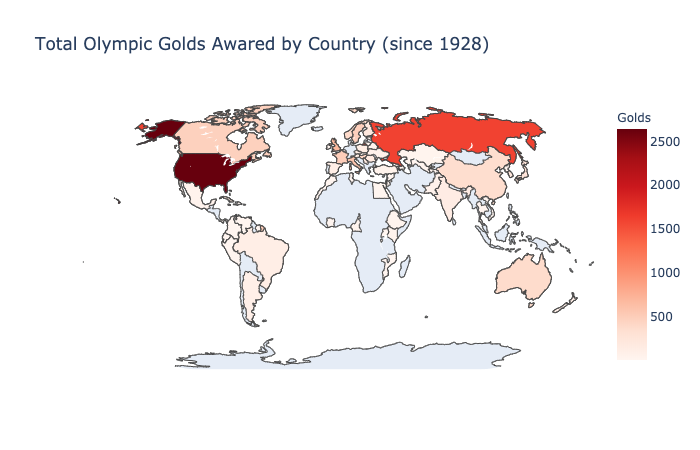

In [19]:
#Prepping the choromap3 object
data = dict(type = 'choropleth',
            locations = df_gold_total['NOC'],
            z = df_gold_total['Gold_counter'],
            text = df_gold_total['region'],
            colorbar = {'title':'Golds'},
            colorscale = 'Reds',
            reversescale = False)

layout = dict(title = 'Total Olympic Golds Awared by Country (since 1928)',
              geo = dict(showframe = False, 
                         projection = {'type':'natural earth'}))

#choromap3 object
choromap3 = go.Figure(data = [data], layout = layout)

#This would display the interactive map, but GitHub doesn't support Plotly well
# display(iplot(choromap3))

#Displaying static image since Plotly object cant be viewed on Github
Image(filename='newplot.png')

USA clearly leads, but China, Russia, Australia and a handful of Western European countries aren't lagging by much!

---

Thanks for taking time to read my analysis. I would love if you could please share any feedback with me on how to improve this. Also don't be a stranger for any additional questions you have with this analysis!

-Adrian

# Appendix #

### Let's tackle a tough question now
_How have different countries performed over time?_

First, we need to do some data manipulation so we can see gold medals by year and by country.

In [20]:
#Aggregating gold medal counts by year and region
byYear = df_gold.groupby(['Year', 'region'])
df_gold = pd.DataFrame(byYear.nunique()['Event']) #this dataframe shows all golds by year by country
df_gold.reset_index(inplace=True)
df_gold = df_gold.rename(index=str, columns={"Event": "gold"})

**How did the US perform historically vs China?**

Text(0.5, 1.0, 'USA vs China Gold Medal Count since 1984')

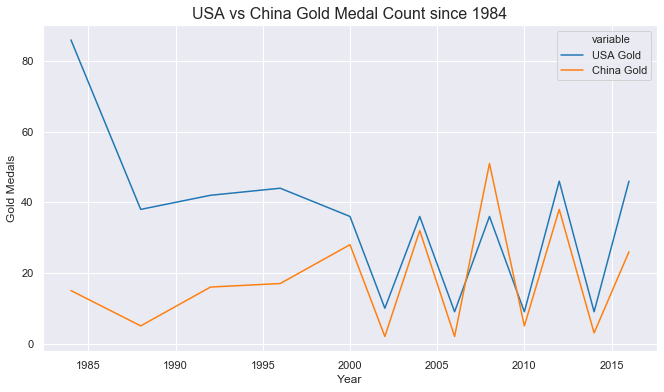

In [21]:
#Filtering only for USA and plotting medal count time series
df_usa = pd.DataFrame(df_gold.loc[df_gold['region'] == 'USA'])
df_usa = df_usa.drop(['region'], axis=1)
df_usa = df_usa.rename(columns = {'gold': 'USA Gold'})
df_usa = df_usa[(df_usa['Year'] >= 1984)]


#Filtering only for China and plotting medal count time series
df_china = pd.DataFrame(df_gold.loc[df_gold['region'] == 'China'])
df_china = df_china.drop(['region'], axis=1)
df_china = df_china.rename(columns = {'gold': 'China Gold'})

#Combining the USA and China dataframes
df_china_usa_gold_combine = pd.merge(df_usa,df_china, 
                      on = 'Year')

#Melting the combined dataframe (for our visual)
df_china_usa_gold_combine_melt = pd.melt(df_china_usa_gold_combine,
                               id_vars = ['Year'], 
                                    value_vars= ['USA Gold', 'China Gold'])

#Graphing the data
plt.figure(figsize = (11,6))
display(sns.lineplot(x="Year", y="value", hue="variable", 
                     data=df_china_usa_gold_combine_melt))
plt.ylabel('Gold Medals')
plt.title('USA vs China Gold Medal Count since 1984',
          fontdict = {'fontsize': 16})